<a href="https://colab.research.google.com/github/darkxaze/Machinelearnning-courseworkprojects/blob/main/3_5variants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Including headers
from tensorflow import keras
import numpy as np
import pandas as pd

from keras.datasets import imdb

In [2]:
# Downloading Data from server
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [3]:
# EDA
print(train_data.shape)
print(len(train_data[0]))
print(pd.isnull(train_data))
print(pd.isna(train_data))

(25000,)
218
[False False False ... False False False]
[False False False ... False False False]


In [4]:
# one hot encoding
# create a matrix for one shot encoding each word in each sequence.
def onehot(sequences, di=10000):
    encoded = np.zeros((len(sequences), di))
    for i, sequence in enumerate(sequences):
        encoded[i,sequence]=1. # when the number matches it equals to 1 else zero 
    return encoded
                      

In [41]:
# alterantive from scratch using keras
#from sklearn.preprocessing import OneHotEncoder
#from keras.preprocessing.text import Tokenizer
# tokenize in order the top 10000 words
#tokenizer = Tokenizer(num_words=10000)

#tokenizer.fit_on_texts(train_data)
#one_hot_results = tokenizer.texts_to_matrix(train_data, mode='binary')
#one_hot_results

AttributeError: ignored

In [5]:
#vectorize data
x_train = onehot(train_data)        
x_test = onehot(test_data)         
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [43]:
x_val=x_train[:10000]
x_ptrain=x_train[10000:]
y_val=y_train[:10000]
y_ptrain=y_train[10000:]

In [48]:
from keras.layers.core.activation import Activation
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
#model.fit(x_ptrain,y_ptrain,batch_size=512,epochs=20,validation_data=(x_val,y_val))
history=model.fit(x_train,y_train,batch_size=512,epochs=20,validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 3s 50ms/step - loss: 0.5122 - accuracy: 0.7883 - val_loss: 0.4080 - val_accuracy: 0.8326
Epoch 2/20
40/40 [==============================] - 2s 38ms/step - loss: 0.2998 - accuracy: 0.9040 - val_loss: 0.2957 - val_accuracy: 0.8896
Epoch 3/20
40/40 [==============================] - 2s 39ms/step - loss: 0.2170 - accuracy: 0.9287 - val_loss: 0.3527 - val_accuracy: 0.8530
Epoch 4/20
40/40 [==============================] - 2s 38ms/step - loss: 0.1779 - accuracy: 0.9392 - val_loss: 0.2963 - val_accuracy: 0.8806
Epoch 5/20
40/40 [==============================] - 2s 38ms/step - loss: 0.1473 - accuracy: 0.9505 - val_loss: 0.2847 - val_accuracy: 0.8890
Epoch 6/20
40/40 [==============================] - 2s 39ms/step - loss: 0.1288 - accuracy: 0.9579 - val_loss: 0.2988 - val_accuracy: 0.8886
Epoch 7/20
40/40 [==============================] - 2s 38ms/step - loss: 0.1067 - accuracy: 0.9665 - val_loss: 0.3215 - val_accuracy: 0.8828
Epoch 8/20
40

In [49]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

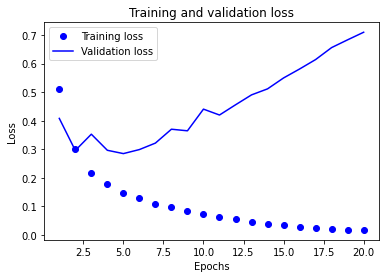

In [52]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

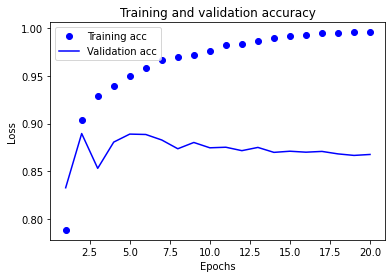

In [53]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [54]:
results=model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7720 - accuracy: 0.8507


In [55]:
model.predict(x_test)

array([[0.03981778],
       [1.        ],
       [0.01039076],
       ...,
       [0.0832856 ],
       [0.00413942],
       [0.02346271]], dtype=float32)

Epoch 1/2
40/40 [==============================] - 2s 37ms/step - loss: 0.4910 - accuracy: 0.8141 - val_loss: 0.3745 - val_accuracy: 0.8772
Epoch 2/2
40/40 [==============================] - 1s 31ms/step - loss: 0.2951 - accuracy: 0.9068 - val_loss: 0.2879 - val_accuracy: 0.8918


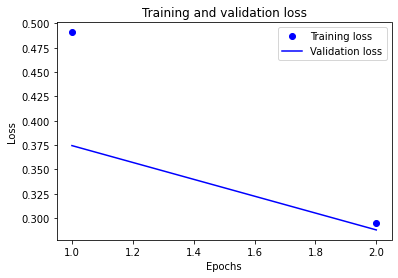

In [56]:

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
#model.fit(x_ptrain,y_ptrain,batch_size=512,epochs=20,validation_data=(x_val,y_val))
history=model.fit(x_train,y_train,batch_size=512,epochs=2,validation_split=0.2)
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [57]:
results=model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3049 - accuracy: 0.8863


Epoch 1/4
40/40 [==============================] - 3s 54ms/step - loss: 0.5040 - accuracy: 0.7966 - val_loss: 0.3623 - val_accuracy: 0.8838
Epoch 2/4
40/40 [==============================] - 1s 29ms/step - loss: 0.2850 - accuracy: 0.9063 - val_loss: 0.2839 - val_accuracy: 0.8934
Epoch 3/4
40/40 [==============================] - 1s 29ms/step - loss: 0.2116 - accuracy: 0.9263 - val_loss: 0.2796 - val_accuracy: 0.8916
Epoch 4/4
40/40 [==============================] - 1s 28ms/step - loss: 0.1728 - accuracy: 0.9399 - val_loss: 0.3083 - val_accuracy: 0.8828


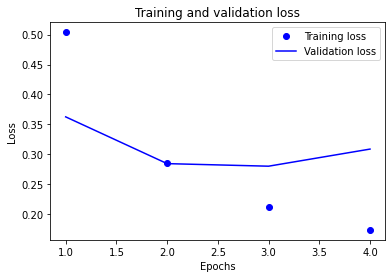

In [10]:
from keras.layers.core.activation import Activation
from keras import models
from keras import layers
model= models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
#model.fit(x_ptrain,y_ptrain,batch_size=512,epochs=20,validation_data=(x_val,y_val))
history=model.fit(x_train,y_train,batch_size=512,epochs=4,validation_split=0.2)
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
results=model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3176 - accuracy: 0.8728


Epoch 1/10
40/40 [==============================] - 2s 41ms/step - loss: 0.4475 - accuracy: 0.8028 - val_loss: 0.3131 - val_accuracy: 0.8840
Epoch 2/10
40/40 [==============================] - 1s 34ms/step - loss: 0.2493 - accuracy: 0.9079 - val_loss: 0.2773 - val_accuracy: 0.8896
Epoch 3/10
40/40 [==============================] - 1s 34ms/step - loss: 0.1878 - accuracy: 0.9335 - val_loss: 0.3025 - val_accuracy: 0.8840
Epoch 4/10
40/40 [==============================] - 1s 33ms/step - loss: 0.1559 - accuracy: 0.9434 - val_loss: 0.3339 - val_accuracy: 0.8786
Epoch 5/10
40/40 [==============================] - 1s 34ms/step - loss: 0.1316 - accuracy: 0.9526 - val_loss: 0.3120 - val_accuracy: 0.8844
Epoch 6/10
40/40 [==============================] - 1s 33ms/step - loss: 0.1087 - accuracy: 0.9614 - val_loss: 0.3913 - val_accuracy: 0.8694
Epoch 7/10
40/40 [==============================] - 1s 34ms/step - loss: 0.0924 - accuracy: 0.9669 - val_loss: 0.4344 - val_accuracy: 0.8682
Epoch 8/10
40

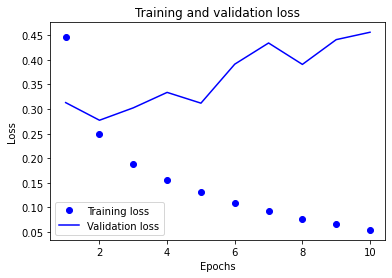

In [13]:
from keras.layers.core.activation import Activation
from keras import models
from keras import layers
model= models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
#model.fit(x_ptrain,y_ptrain,batch_size=512,epochs=10,validation_data=(x_val,y_val))
history=model.fit(x_train,y_train,batch_size=512,epochs=10,validation_split=0.2)
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
results=model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.4950 - accuracy: 0.8621


Epoch 1/2
40/40 [==============================] - 2s 40ms/step - loss: 0.4649 - accuracy: 0.8056 - val_loss: 0.3200 - val_accuracy: 0.8878
Epoch 2/2
40/40 [==============================] - 1s 33ms/step - loss: 0.2565 - accuracy: 0.9075 - val_loss: 0.3565 - val_accuracy: 0.8540


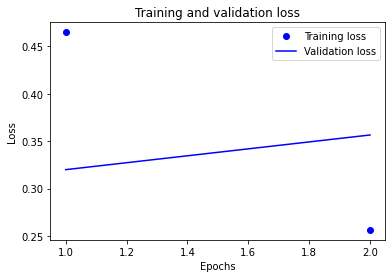

In [16]:
from keras.layers.core.activation import Activation
from keras import models
from keras import layers
model= models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
#model.fit(x_ptrain,y_ptrain,batch_size=512,epochs=10,validation_data=(x_val,y_val))
history=model.fit(x_train,y_train,batch_size=512,epochs=2,validation_split=0.2)
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
results=model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3565 - accuracy: 0.8481


Epoch 1/8
40/40 [==============================] - 2s 35ms/step - loss: 0.4484 - accuracy: 0.8127 - val_loss: 0.3274 - val_accuracy: 0.8812
Epoch 2/8
40/40 [==============================] - 1s 29ms/step - loss: 0.2517 - accuracy: 0.9129 - val_loss: 0.3358 - val_accuracy: 0.8612
Epoch 3/8
40/40 [==============================] - 1s 29ms/step - loss: 0.1861 - accuracy: 0.9337 - val_loss: 0.2679 - val_accuracy: 0.8936
Epoch 4/8
40/40 [==============================] - 1s 29ms/step - loss: 0.1460 - accuracy: 0.9487 - val_loss: 0.3010 - val_accuracy: 0.8870
Epoch 5/8
40/40 [==============================] - 1s 29ms/step - loss: 0.1214 - accuracy: 0.9589 - val_loss: 0.3180 - val_accuracy: 0.8892
Epoch 6/8
40/40 [==============================] - 1s 30ms/step - loss: 0.1018 - accuracy: 0.9661 - val_loss: 0.3506 - val_accuracy: 0.8838
Epoch 7/8
40/40 [==============================] - 1s 30ms/step - loss: 0.0855 - accuracy: 0.9712 - val_loss: 0.4014 - val_accuracy: 0.8760
Epoch 8/8
40/40 [===

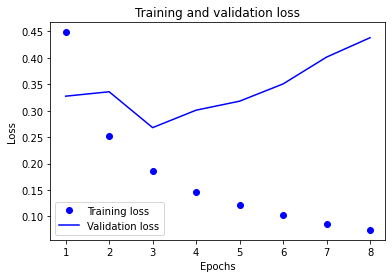

In [19]:
from keras.layers.core.activation import Activation
from keras import models
from keras import layers
model= models.Sequential()
model.add(layers.Dense(16,activation='tanh',input_shape=(10000,)))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
#model.fit(x_ptrain,y_ptrain,batch_size=512,epochs=10,validation_data=(x_val,y_val))
history=model.fit(x_train,y_train,batch_size=512,epochs=3,validation_split=0.2)
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
results=model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.4754 - accuracy: 0.8622


Epoch 1/3
30/30 [==============================] - 2s 47ms/step - loss: 0.5372 - accuracy: 0.7771 - val_loss: 0.4020 - val_accuracy: 0.8601
Epoch 2/3
30/30 [==============================] - 1s 34ms/step - loss: 0.3159 - accuracy: 0.9006 - val_loss: 0.3101 - val_accuracy: 0.8841
Epoch 3/3
30/30 [==============================] - 1s 37ms/step - loss: 0.2289 - accuracy: 0.9257 - val_loss: 0.2804 - val_accuracy: 0.8911


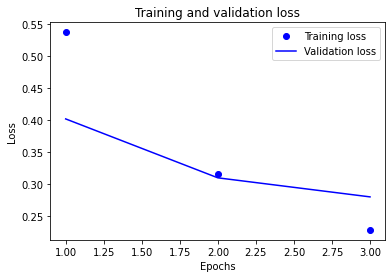

In [14]:
from keras.layers.core.activation import Activation
from keras import models
from keras import layers
model= models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
#model.fit(x_ptrain,y_ptrain,batch_size=512,epochs=10,validation_data=(x_val,y_val))
history=model.fit(x_train,y_train,batch_size=512,epochs=3,validation_split=0.4)
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
results=model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3017 - accuracy: 0.8822


Epoch 1/2
35/35 [==============================] - 3s 57ms/step - loss: 0.4610 - accuracy: 0.7989 - val_loss: 0.3007 - val_accuracy: 0.8865
Epoch 2/2
35/35 [==============================] - 2s 49ms/step - loss: 0.2454 - accuracy: 0.9073 - val_loss: 0.3578 - val_accuracy: 0.8549


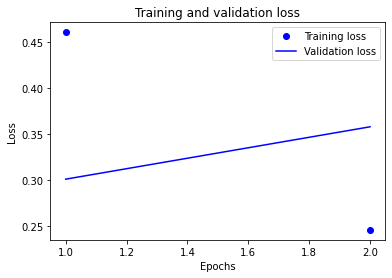

In [25]:
from keras.layers.core.activation import Activation
from keras import models
from keras import layers
model= models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='tanh'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
#model.fit(x_ptrain,y_ptrain,batch_size=512,epochs=10,validation_data=(x_val,y_val))
history=model.fit(x_train,y_train,batch_size=512,epochs=2,validation_split=0.3)
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
results=model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3687 - accuracy: 0.8461
